<a href="https://colab.research.google.com/github/aacosta13/IDEAS-Work/blob/master/development_patterns_IDEAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Domain Champion Data**
By: Armando Acosta

Notebook Overview:
This notebook aims to help display various data and information on the development patterns of various software repositories.

***Table of Top Contributors***

This first half of the script simply retrieves the GitHub usernames of the top contributors for each project.

**First:** Create dictionary object of project names and their url path. This helps to iterate through each project and ensure the API handles the links correctly.

In [ ]:
project_dict = {
    'Moose': 'idaholab/moose',
    'Spack': 'spack/spack',
    'yt': 'yt-project/yt',
    'petsc': 'petsc/petsc',
    'E3SM': 'E3SM-Project/E3SM',
    'lammps': 'lammps/lammps',
    'gromacs': 'gromacs/gromacs',
    'OSGConnect': 'OSGConnect/TOREVIEW-tutorial-namd',
    'QMCPACK': 'QMCPACK/qmcpack',
    'Nek5000': 'Nek5000/Nek5000',
    'nwchemgit': 'nwchemgit/nwchem',
    # 'ECP-astro': '???', No url for this project
    'lanl': 'lanl/LATTE',
    'CRL': 'gridaphobe/CRL',
    'enzo-project': 'enzo-project/enzo-dev'
}

**Second:** The main function for retrieving the information is created. Here, we set up to write the information to a separate file and create another dictionary to use the pandas library to assist in printing out the developer names in a DataFrame (we also use parameters passed in from main to use user-inputted login credentials to access the GitHub API).

In [ ]:
def retrieve_repo_info(uname, pword):
    devfile = open('dev_info.txt', 'w')
    devfile.write('Repository Name/Top Contributor/Number of Contributions')
    print(file=devfile)

    data = {'Repository Name': [],
            'Top Contributor': [],
            'Number of Contributions': []}


if __name__ == '__main__':
    username = input('GitHub Authentication Username: ')
    password = input('Password: ')
    retrieve_repo_info(username, password)

**Third:** The function uses a for loop to iterate through each repository and return a repository's respective, top contributor. This information is both placed in a file and printed to the terminal in a dataframe.

In [ ]:
for project in project_dict:
        # Following block for writing data to file
        print(' ', file=devfile)
        url = 'https://api.github.com/repos/%s/contributors' % project_dict[project]

        response = requests.get(url, auth=(uname, pword))
        json_response = response.json()

        print(project, file=devfile)
        print('Top Contributor:', json_response[0]['login'], file=devfile)
        print('Contributions:', json_response[0]['contributions'], file=devfile)
        print('-----------------------------------', file=devfile)

        # Following block for creating dataframe
        data['Repository Name'].append(project)
        data['Top Contributor'].append(json_response[0]['login'])
        data['Number of Contributions'].append(json_response[0]['contributions'])

    df = pd.DataFrame(data)
    print(df)

**Final Script:** The final script is put together below. When ran, it prints the results of the top contributors. Example provided below with results at time of running.

In [ ]:
#!/usr/bin/env python3

'''
Small script to retrieve domain champ info from different repos. Prints to file and creates a pandas dataframe

By: Armando Acosta
'''

import requests
import pandas as pd
import getpass

project_dict = {
    'Moose': 'idaholab/moose',
    'Spack': 'spack/spack',
    'yt': 'yt-project/yt',
    'petsc': 'petsc/petsc',
    'E3SM': 'E3SM-Project/E3SM',
    'lammps': 'lammps/lammps',
    'gromacs': 'gromacs/gromacs',
    'OSGConnect': 'OSGConnect/TOREVIEW-tutorial-namd',
    'QMCPACK': 'QMCPACK/qmcpack',
    'Nek5000': 'Nek5000/Nek5000',
    'nwchemgit': 'nwchemgit/nwchem',
    # 'ECP-astro': '???', no url for this project
    'lanl': 'lanl/LATTE',
    'CRL': 'gridaphobe/CRL',
    'enzo-project': 'enzo-project/enzo-dev'
}


def retrieve_repo_info(uname, pword):
    devfile = open('dev_info.txt', 'w')
    devfile.write('Repository Name/Top Contributor/Number of Contributions')
    print(file=devfile)

    data = {'Repository Name': [],
            'Top Contributor': [],
            'Number of Contributions': []}

    for project in project_dict:
        # Following block for writing data to file
        print(' ', file=devfile)
        url = 'https://api.github.com/repos/%s/contributors' % project_dict[project]

        response = requests.get(url, auth=(uname, pword))
        json_response = response.json()

        print(project, file=devfile)
        print('Top Contributor:', json_response[0]['login'], file=devfile)
        print('Contributions:', json_response[0]['contributions'], file=devfile)
        print('-----------------------------------', file=devfile)

        # Following block for creating dataframe
        data['Repository Name'].append(project)
        data['Top Contributor'].append(json_response[0]['login'])
        data['Number of Contributions'].append(json_response[0]['contributions'])

    df = pd.DataFrame(data)
    print(df)


if __name__ == '__main__':
    username = input('GitHub Authentication Username: ')
    password = getpass.getpass(prompt='Password: ')
    retrieve_repo_info(username, password)


GitHub Authentication Username: aacosta13
Password: ··········
   Repository Name Top Contributor  Number of Contributions
0            Moose        permcody                     6251
1            Spack        tgamblin                     2426
2               yt     matthewturk                     8319
3            petsc      BarrySmith                    20601
4             E3SM      jedwards4b                     3747
5           lammps        akohlmey                     5396
6          gromacs        mabraham                     1721
7       OSGConnect          dmbala                       31
8          QMCPACK          ye-luo                     3991
9          Nek5000          stgeke                      450
10       nwchemgit         edoapra                     5439
11            lanl          cnegre                      163
12             CRL      gridaphobe                      132
13    enzo-project     matthewturk                      558


***Plotting Out Top Developers***

Here, a histogram is created to represent the proportion of contributions made by the top developers compared to the total number of commits to each project.

**First:** Count the number of commits for the project.

In [ ]:
def count_repo_commit(project, uname, pword):
    url = 'https://api.github.com/repos/%s/stats/contributors' % project

    response = requests.get(url, auth=(uname, pword))
    json_response = response.json()

    count = 0
    for item in json_response:
        count += int(item['total'])

    return count

**Second:** We create a list for the proportioned number of commits within the script. We then use this list to help create the bar chart. Code and chart shown below.

GitHub Authentication Username: aacosta13
Password: ··········


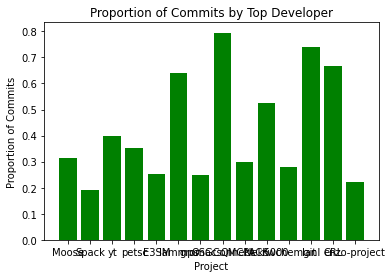

In [1]:
#!/usr/bin/env python3

'''
Small script to retrieve domain champ info from different repos. Prints to file and creates a pandas dataframe

By: Armando Acosta
'''

import requests
import pandas as pd
import getpass
import matplotlib.pyplot as plt

project_dict = {
    'Moose': 'idaholab/moose',
    'Spack': 'spack/spack',
    'yt': 'yt-project/yt',
    'petsc': 'petsc/petsc',
    'E3SM': 'E3SM-Project/E3SM',
    'lammps': 'lammps/lammps',
    'gromacs': 'gromacs/gromacs',
    'OSGConnect': 'OSGConnect/TOREVIEW-tutorial-namd',
    'QMCPACK': 'QMCPACK/qmcpack',
    'Nek5000': 'Nek5000/Nek5000',
    'nwchemgit': 'nwchemgit/nwchem',
    # 'ECP-astro': '???', no url for this project
    'lanl': 'lanl/LATTE',
    'CRL': 'gridaphobe/CRL',
    'enzo-project': 'enzo-project/enzo-dev'
}

project_list = ['Moose', 'Spack', 'yt', 'petsc', 'E3SM', 'lammps', 'gromacs', 'OSGConnect', 'QMCPACK', 'Nek5000',
                'nwchemgit', 'lanl', 'CRL', 'enzo-project']


def count_repo_commit(project, uname, pword):
    url = 'https://api.github.com/repos/%s/stats/contributors' % project

    response = requests.get(url, auth=(uname, pword))
    json_response = response.json()

    count = 0
    for item in json_response:
        count += int(item['total'])

    return count


def retrieve_repo_info(uname, pword):
    devfile = open('dev_info.txt', 'w')
    devfile.write('Repository Name/Top Contributor/Number of Contributions')
    print(file=devfile)

    data = {'Repository Name': [],
            'Top Contributor': [],
            'Number of Contributions': [],
            'Contribution Total for Repo': []}

    commit_proportion = []

    for project in project_dict:
        # Following block for writing data to file
        print(' ', file=devfile)
        url = 'https://api.github.com/repos/%s/contributors' % project_dict[project]
        commit_count = count_repo_commit(project_dict[project], uname, pword)

        response = requests.get(url, auth=(uname, pword))
        json_response = response.json()

        print(project, file=devfile)
        print('Top Contributor:', json_response[0]['login'], file=devfile)
        print('Contributions:', json_response[0]['contributions'], file=devfile)
        print('-----------------------------------', file=devfile)

        # Following block for creating dataframe
        data['Repository Name'].append(project)
        data['Top Contributor'].append(json_response[0]['login'])
        data['Number of Contributions'].append(json_response[0]['contributions'])
        data['Contribution Total for Repo'].append(commit_count)

        if commit_count != 0:
            commit_proportion.append(int(json_response[0]['contributions']) / commit_count)

    # Making Bar Chart
    x_pos = [i for i, _ in enumerate(project_list)]
    plt.bar(x_pos, commit_proportion, color='green')
    plt.xlabel("Project")
    plt.ylabel("Proportion of Commits")
    plt.title("Proportion of Commits by Top Developer")

    plt.xticks(x_pos, project_dict)
    plt.show()


if __name__ == '__main__':
    username = input('GitHub Authentication Username: ')
    password = getpass.getpass(prompt='Password: ')
    retrieve_repo_info(username, password)


***Inspecting Files Touched by Top Contributors***

The second half of this script inspects all files touched by these top contributors within the respective repositories. Due to the amount of contributions per user, this script may take quite a while to run.

**First:** Setup is similar to first half, however we now must juggle two instances of the API requests due to accessing each commit's respective JSON data. This can be seen below:

In [ ]:
def retrieve_file_info(uname, pwd):
    for project in project_dict:
        print(' ', file=commitfile)
        commit_url = 'https://api.github.com/repos/%s/commits' % project_dict[project]
        contributor_url = 'https://api.github.com/repos/%s/contributors' % project_dict[project]

        commit_response = requests.get(commit_url, auth=(uname, pwd))
        commit_json_response = commit_response.json()
        contributor_response = requests.get(contributor_url, auth=(uname, pwd))
        contributor_json_response = contributor_response.json()

        item_count = 0
        page_no = 1
        max_page = False
        # Parse through JSON response of API for author
        while not max_page:
            for item in commit_json_response:
                if item['author'] is None:
                    item_count += 1
                    continue

                # If commit belongs to top dev, analyze the files here
                if item['author']['login'] == contributor_json_response[0]['login']:
                    individual_commit_url = 'https://api.github.com/repos/%s/commits' % project_dict[project] \
                                            + '/' + str(item['sha'])
                    individual_commit_response = requests.get(individual_commit_url, auth=(uname, pwd))
                    individual_json_response = individual_commit_response.json()

                    print('-----------------------------------')
                    print('Developer: ', contributor_json_response[0]['login'])
                    print('')
                    print("Files modified by commit:")

                    for file in individual_json_response['files']:
                        print(file['filename'])
                item_count += 1

            if item_count == 30:
                page_no += 1
                commit_url += '?&page=%s' % str(page_no)
                commit_response = requests.get(commit_url, auth=(uname, pwd))
                commit_json_response = commit_response.json()
                item_count = 0

            else:
                max_page = True
                

As noted, the code is a bit more complex than the previous work due to having to search within each commit contributed by the top developer. This means there are "nested" API requests performed in order to retrieve the correct information. The full script is provided below with a sample of the output (full output not shown, as it would be very large).

In [ ]:
#!/usr/bin/env python3

'''
Script to analyze files touched by top developer of different project repos

By: Armando Acosta
'''

import requests
import getpass

project_dict = {
    'Moose': 'idaholab/moose',
    'Spack': 'spack/spack',
    'yt': 'yt-project/yt',
    'petsc': 'petsc/petsc',
    'E3SM': 'E3SM-Project/E3SM',
    'lammps': 'lammps/lammps',
    'gromacs': 'gromacs/gromacs',
    'OSGConnect': 'OSGConnect/TOREVIEW-tutorial-namd',
    'QMCPACK': 'QMCPACK/qmcpack',
    'Nek5000': 'Nek5000/Nek5000',
    'nwchemgit': 'nwchemgit/nwchem',
    'lanl': 'lanl/LATTE',
    'CRL': 'gridaphobe/CRL',
    'enzo-project': 'enzo-project/enzo-dev'
}



def retrieve_file_info(uname, pwd):
    commitfile = open('commit_info.txt', 'w')
    commitfile.write('Repository Name/Top Committer/Commit Files Affected')
    print(file=commitfile)

    data = {'Repository': [],
            'Committer': [],
            'Commit Files Touched': []}

    for project in project_dict:
        print(' ', file=commitfile)
        commit_url = 'https://api.github.com/repos/%s/commits' % project_dict[project]
        contributor_url = 'https://api.github.com/repos/%s/contributors' % project_dict[project]

        commit_response = requests.get(commit_url, auth=(uname, pwd))
        commit_json_response = commit_response.json()
        contributor_response = requests.get(contributor_url, auth=(uname, pwd))
        contributor_json_response = contributor_response.json()

        item_count = 0
        page_no = 1
        max_page = False
        # Parse through JSON response of API for author
        while not max_page:
            for item in commit_json_response:
                if item['author'] is None:
                    item_count += 1
                    continue

                # If commit belongs to top dev, analyze the files here
                if item['author']['login'] == contributor_json_response[0]['login']:
                    individual_commit_url = 'https://api.github.com/repos/%s/commits' % project_dict[project] \
                                            + '/' + str(item['sha'])
                    individual_commit_response = requests.get(individual_commit_url, auth=(uname, pwd))
                    individual_json_response = individual_commit_response.json()

                    print('-----------------------------------')
                    print('Developer: ', contributor_json_response[0]['login'])
                    print('')
                    print("Files modified by commit:")

                    for file in individual_json_response['files']:
                        print(file['filename'])
                item_count += 1

            if item_count == 30:
                page_no += 1
                commit_url += '?&page=%s' % str(page_no)
                commit_response = requests.get(commit_url, auth=(uname, pwd))
                commit_json_response = commit_response.json()
                item_count = 0

            else:
                max_page = True


if __name__ == '__main__':
    username = input('GitHub Authentication Username: ')
    password = getpass.getpass(prompt='Password: ')
    retrieve_file_info(username, password)


-----------------------------------
Developer:  permcody

Files modified by commit:
.gitignore
-----------------------------------
Developer:  permcody

Files modified by commit:
modules/heat_conduction/test/tests/radiation_transfer_action/tests
-----------------------------------
Developer:  permcody

Files modified by commit:
modules/phase_field/test/tests/MultiSmoothCircleIC/tests
modules/phase_field/test/tests/initial_conditions/tests
-----------------------------------
Developer:  permcody

Files modified by commit:
modules/phase_field/include/userobjects/PolycrystalUserObjectBase.h
modules/phase_field/src/postprocessors/FeatureFloodCount.C
modules/phase_field/src/userobjects/PolycrystalUserObjectBase.C
-----------------------------------
Developer:  permcody

Files modified by commit:
modules/heat_conduction/doc/content/source/actions/RadiationTransferAction.md
modules/heat_conduction/doc/content/syntax/GrayDiffuseRadiation/index.md
modules/heat_conduction/include/actions/Radiati

KeyboardInterrupt: ignored

##**Overhelping Data**

***Multiple Replies***

This part of the script analyzes pull requests that encounter multiple comments attached to the request, implying an excess of development help

**First:** Like the previous scripts, this one follows the same convention of using the API to collect the information of each pull request. Like the second half of the Domain Champion script, a method of "nested" API requests are used.

In [ ]:
def retrieve_pull_info(uname, pwd):
    for project in project_dict:
        pull_url = 'https://api.github.com/repos/%s/pulls' % project_dict[project]
        pull_response = requests.get(pull_url, auth=(uname, pwd))
        pull_json_response = pull_response.json()

        item_count = 0
        page_no = 1
        max_page = False
        # Parse through JSON response of API for comments list
        while not max_page:
            for item in pull_json_response:
                # Skip if no comments url
                if item['review_comments_url'] is None:
                    item_count += 1
                    continue

                # If comments url exists jump to it
                comments_url = item['review_comments_url']
                comments_response = requests.get(comments_url, auth=(uname, pwd))
                comments_json_response = comments_response.json()
                comment_count = 0
                

Upon running the completed script, one will see the comments of the "overcommented" pull requests printed to the terminal along with the comment count. A sample may be seen below (work in progress)

In [1]:
import requests
import getpass

project_dict = {
    'Moose': 'idaholab/moose',
    'Spack': 'spack/spack',
    'yt': 'yt-project/yt',
    'petsc': 'petsc/petsc',
    'E3SM': 'E3SM-Project/E3SM',
    'lammps': 'lammps/lammps',
    'gromacs': 'gromacs/gromacs',
    'OSGConnect': 'OSGConnect/TOREVIEW-tutorial-namd',
    'QMCPACK': 'QMCPACK/qmcpack',
    'Nek5000': 'Nek5000/Nek5000',
    'nwchemgit': 'nwchemgit/nwchem',
    # 'ECP-astro': '???',
    'lanl': 'lanl/LATTE',
    'CRL': 'gridaphobe/CRL',
    'enzo-project': 'enzo-project/enzo-dev'
}


def retrieve_pull_info(uname, pwd):
    for project in project_dict:
        pull_url = 'https://api.github.com/repos/%s/pulls' % project_dict[project]
        pull_response = requests.get(pull_url, auth=(uname, pwd))
        pull_json_response = pull_response.json()

        item_count = 0
        page_no = 1
        max_page = False
        # Parse through JSON response of API for comments list
        while not max_page:
            for item in pull_json_response:
                # Skip if no comments url
                if item['review_comments_url'] is None:
                    item_count += 1
                    continue

                # If comments url exists jump to it
                comments_url = item['review_comments_url']
                comments_response = requests.get(comments_url, auth=(uname, pwd))
                comments_json_response = comments_response.json()
                comment_count = 0

                if not comments_json_response:
                    continue
                else:
                    for comment in comments_json_response:
                        if comment_count > 1:
                            print('Repository: ', project)
                            print('Pull comment: ', comment['body'])
                        comment_count += 1

                    if comment_count > 1:
                        str(comment_count)
                        print('Total comments for pull: ', comment_count)
                        print('-----------------------')

                item_count += 1

            if item_count == 30:
                page_no += 1
                pull_url += '?&page=%s' % str(page_no)
                pull_response = requests.get(pull_url, auth=(uname, pwd))
                pull_json_response = pull_response.json()
                item_count = 0

            else:
                max_page = True


if __name__ == '__main__':
    username = input('GitHub Authentication Username: ')
    # password = getpass.getpass(prompt='Password: ')
    password = getpass.getpass(prompt='Password: ')
    retrieve_pull_info(username, password)


GitHub Authentication Username: aacosta13
Password: ··········
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This contains a submodule update
Repository:  Moose
Pull comment:  **Caution!** This conta